緣起
===

話說李秋紅昨天跟我說她新家的蟑螂多不勝數，稍微提及
1. 她在廚房看到蟑螂的頻率是每天一到兩隻，
2. 每看到一隻蟑螂，背後可能有十隻

我想這是很好的機會來練習一下下貝葉斯概率，於是有了以下無聊的演算。（也是運用PyMC3的好練習）

In [2]:
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
## f: 蟑螂出現的次數（每天）
## λ: 蟑螂出現的平均次數
## n: 蟑螂的總數

蟑螂模型 = pm.Model()
with 蟑螂模型:
    
    ## 假設蟑螂的數量平均分佈於[0, 1000]的區間
    n = pm.Uniform('n', 0, 1000)
    
    ## 假設每十隻蟑螂我們都有機會平均看到一隻，且真實看到數量呈高斯分佈
    λ = pm.Normal('λ', mu=n/10, sd=5)
    
    ## 假設蟑螂出現的次數呈帕松分佈
    ## 連續一星期每天看到兩隻蟑螂
    ## 殺死的蟑螂數量不注意影響出現的頻率
    f = pm.Poisson('f', mu=λ, shape=7, observed=[2,2,2,2,2,2,2])

In [29]:
with 蟑螂模型:
    ## 蒙特卡罗模擬
    trace = pm.sample(tune=1000, draws=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2000/2000 [00:02<00:00, 787.27it/s]


以下是蟑螂總數量的分佈，可以看到有95%的概率會介於20到50隻：）

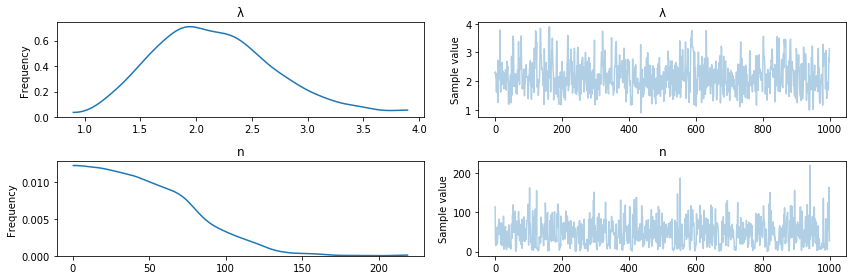

In [30]:
_ = pm.traceplot(trace)

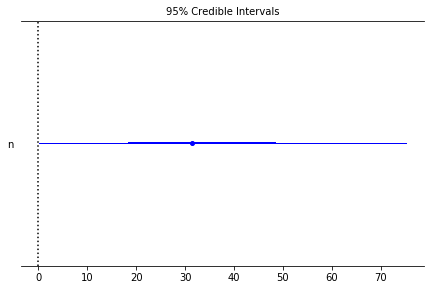

In [27]:
_ = pm.forestplot(trace, varnames='n')